# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ 분산이 높으면 큰 값의 노이즈까지 모델링에 포함된 과적합 상태가 되고 모델이 복잡해진다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ 높은 편향은 정확한 값과 맞지 않는 값들로 이루어져 과소적합 문제가 발생한다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ 배깅이 적합. 배깅은 샘플을 여러번 뽑아 동일한 모델 N개를 학습시키기 때문에 개별 모델의 분산이 감소함.


- High bias problem : 🐻‍❄️ 부스팅이 적합. 부스팅은 가중치를 활용하여 연속적인 약학습기를 생성하고, 이를 통해 강학습기 생성하므로 이전 단계의 편향을 보완할 수 있음.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/ToBigs22/과제/week3/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [58]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [60]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [61]:
# id drop
df = df.drop(columns=['CLIENTNUM'])

In [62]:
# 인코딩
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [63]:
df['Attrition_Flag'].unique()

array([0, 1])

In [64]:
from sklearn.preprocessing import LabelEncoder

# 범주형 인코딩 - Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

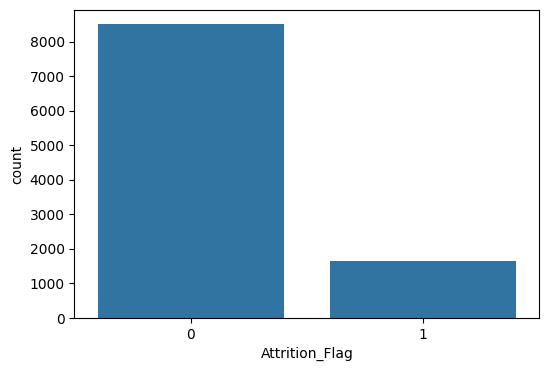

In [39]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.show()

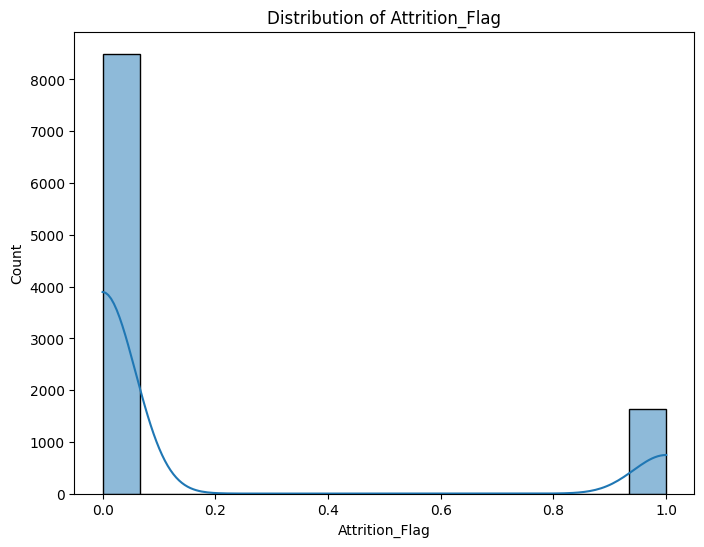

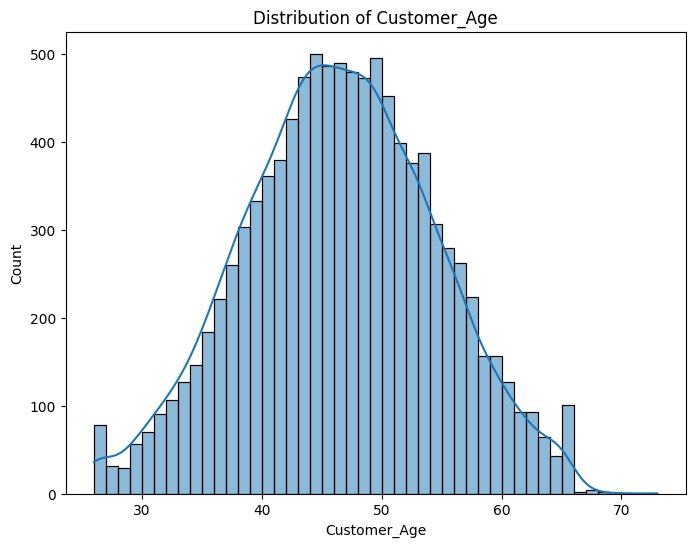

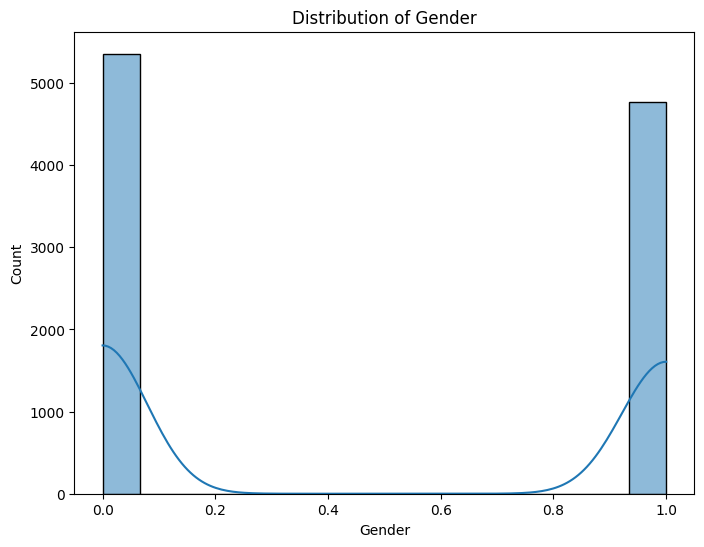

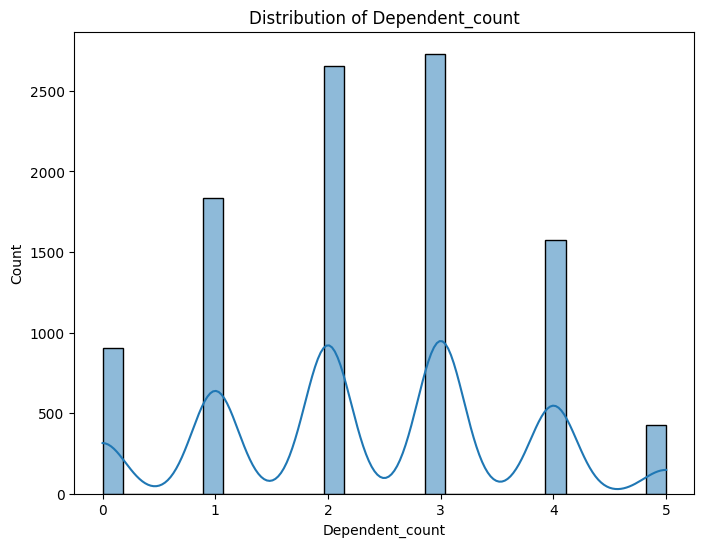

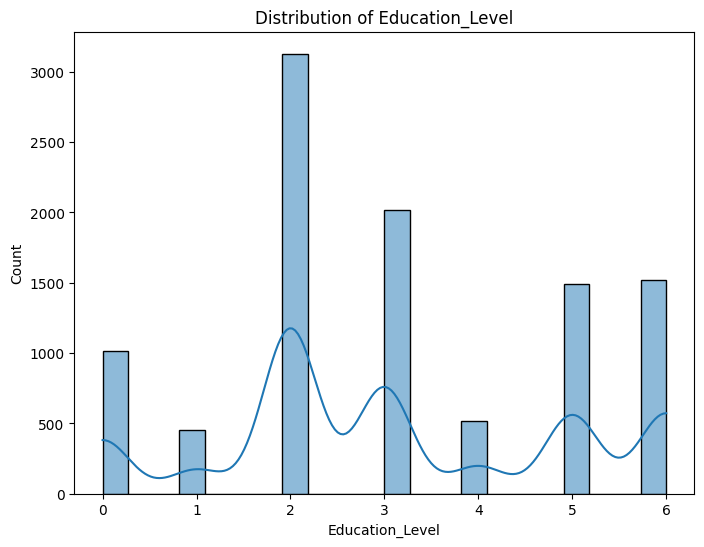

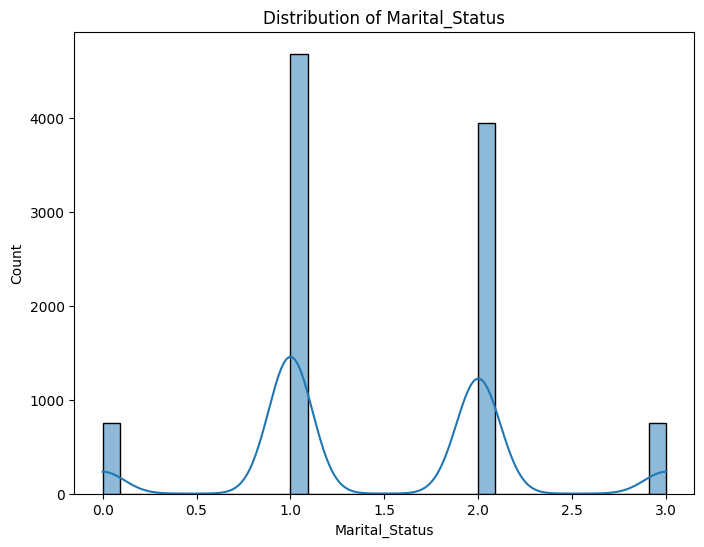

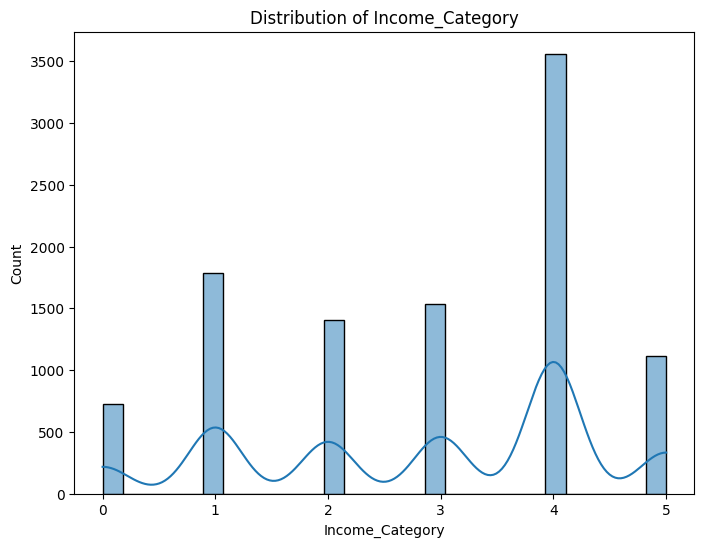

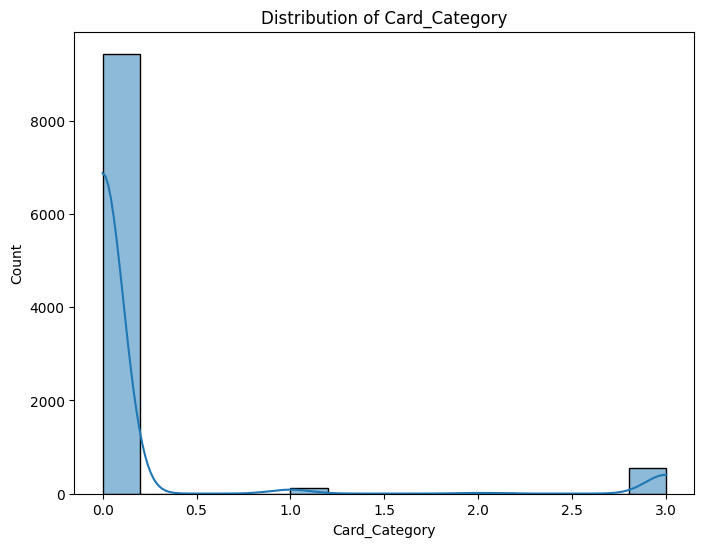

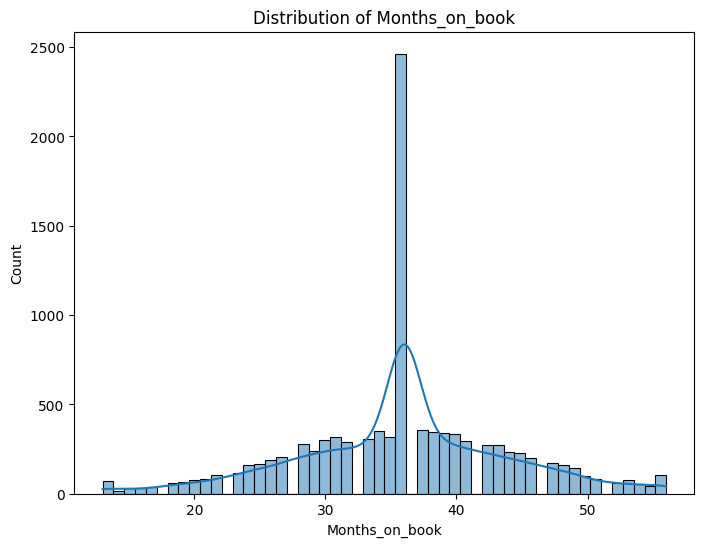

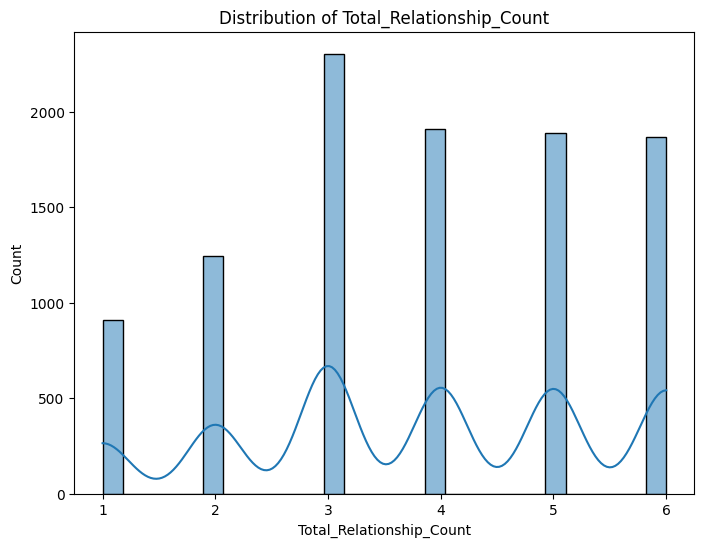

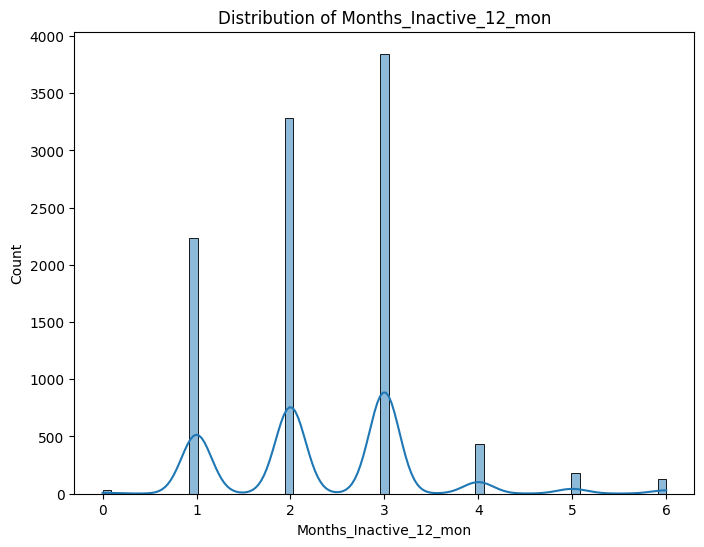

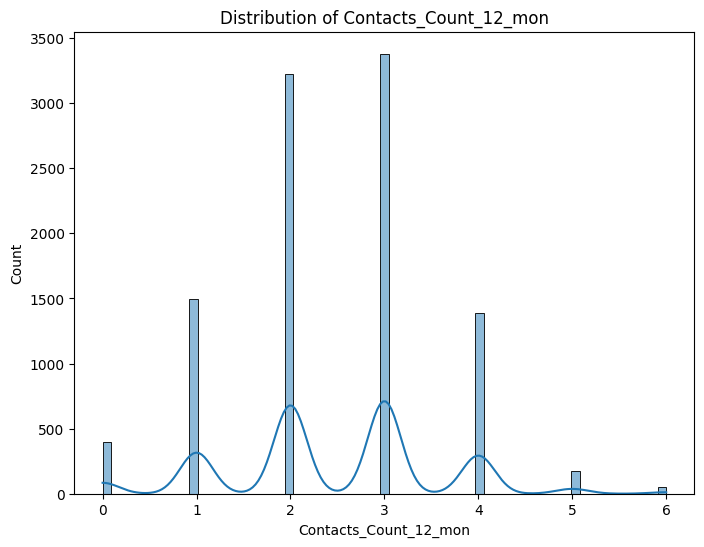

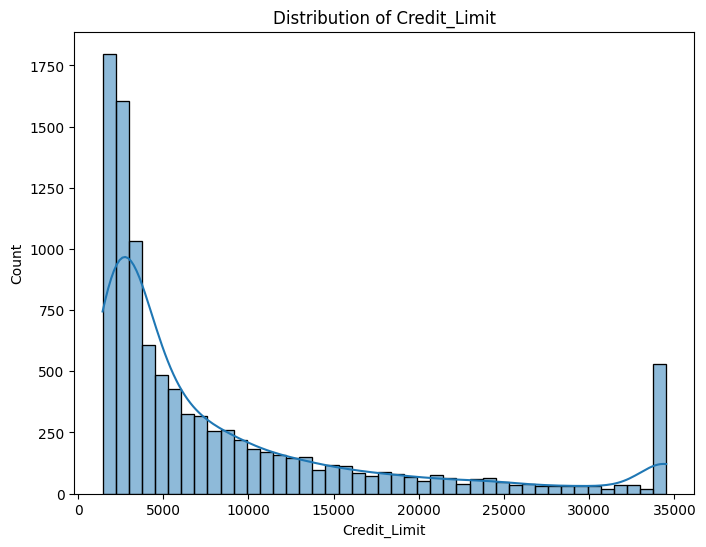

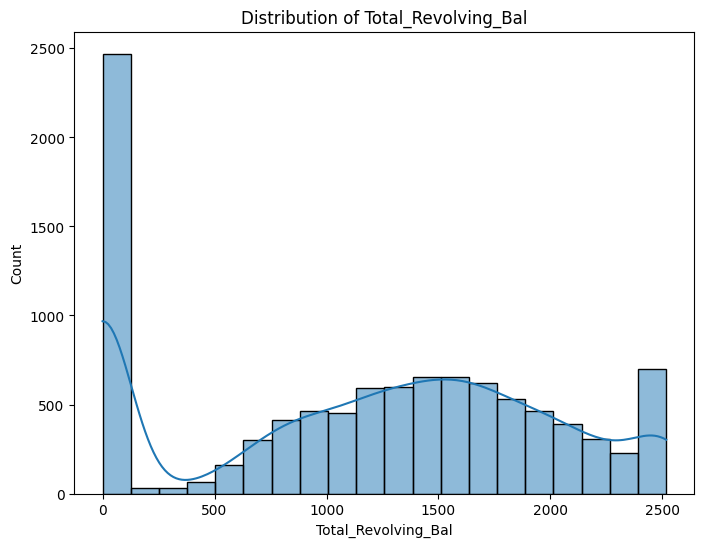

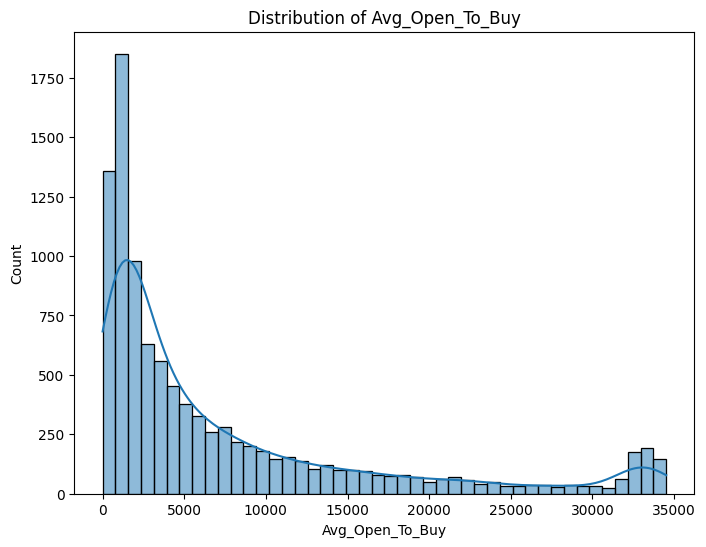

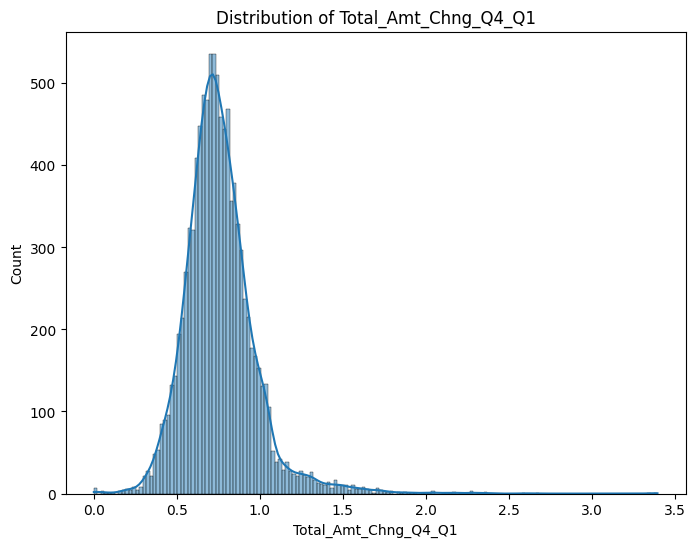

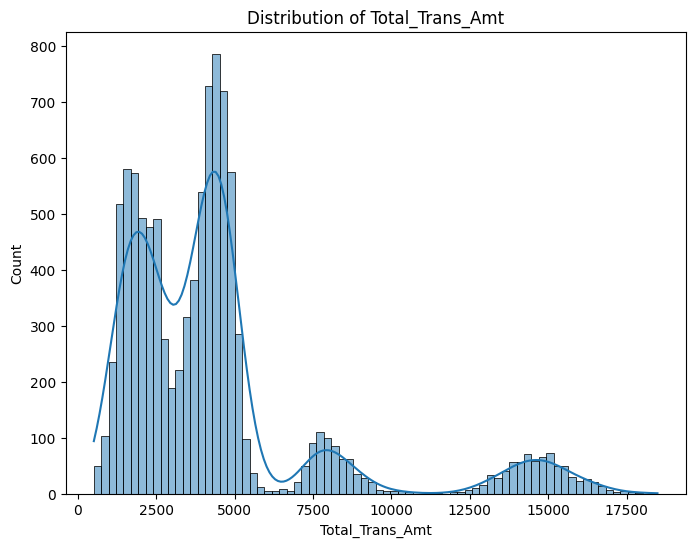

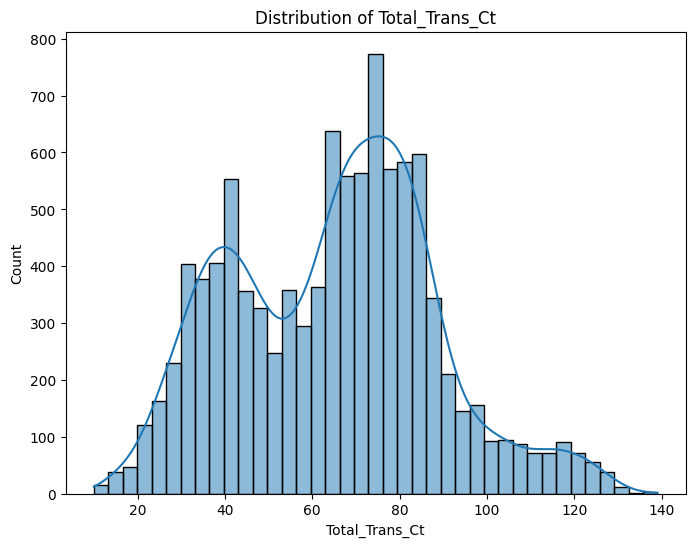

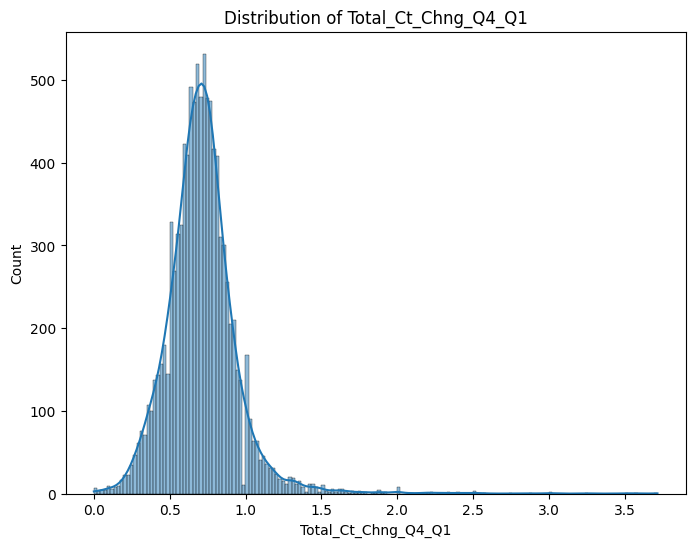

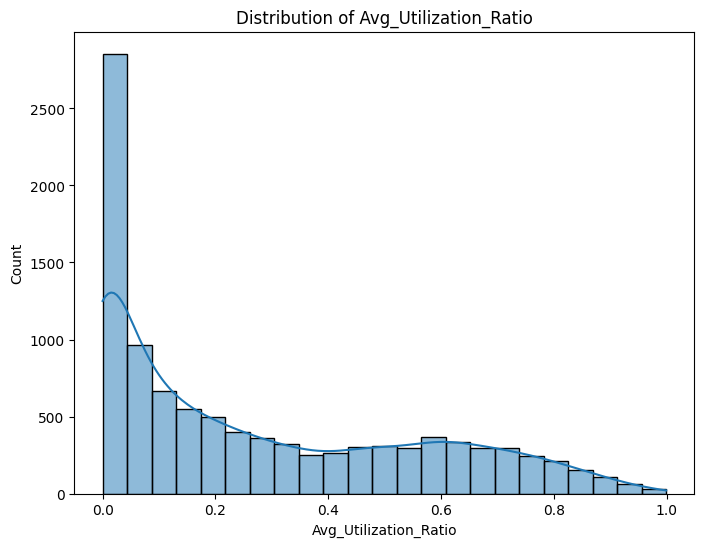

In [40]:
# Histogram
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

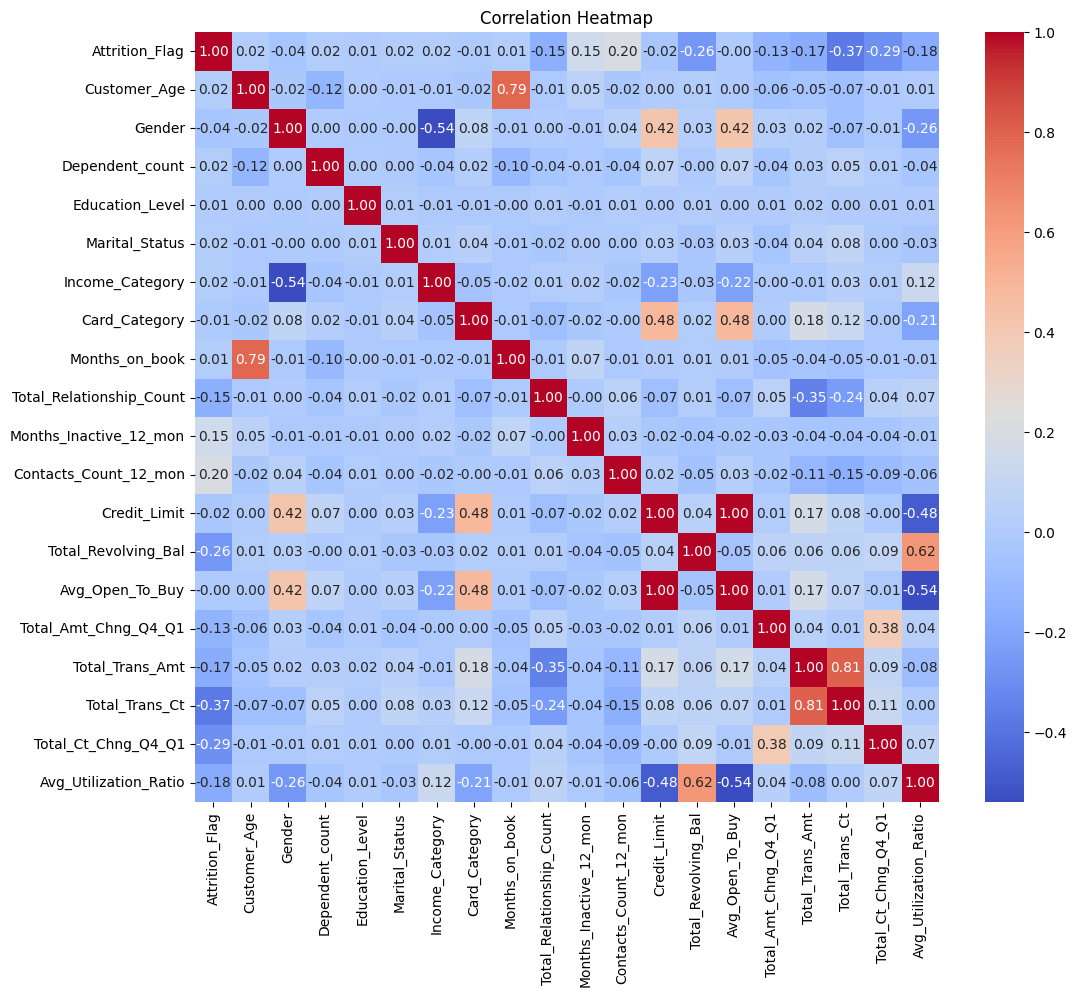

In [41]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
# 데이터셋 분리
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

In [68]:
# 스케일링
from sklearn.preprocessing import StandardScaler

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import numpy as np

In [74]:
# 모델 성능 평가 함수
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

In [75]:
# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

dt_results = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt)
print("Decision Tree Results:", dt_results)

Decision Tree Results: {'Accuracy': 0.9305692662059888, 'Precision': 0.7878787878787878, 'Recall': 0.7862903225806451, 'F1 Score': 0.7870837537840564, 'ROC AUC': 0.8725002537008613}


In [76]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

rf_results = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)
print("Random Forest Results:", rf_results)

Random Forest Results: {'Accuracy': 0.9588680487002303, 'Precision': 0.9344262295081968, 'Recall': 0.8044354838709677, 'F1 Score': 0.8645720476706392, 'ROC AUC': 0.9899554279299279}


In [77]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)[:, 1]

ab_results = evaluate_model(y_test, y_pred_ab, y_pred_proba_ab)
print("AdaBoost Results:", ab_results)

AdaBoost Results: {'Accuracy': 0.9549193813754524, 'Precision': 0.886021505376344, 'Recall': 0.8306451612903226, 'F1 Score': 0.8574401664932362, 'ROC AUC': 0.9838563006608907}


In [78]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

gb_results = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)
print("Gradient Boosting Results:", gb_results)

Gradient Boosting Results: {'Accuracy': 0.9641329384666009, 'Precision': 0.9348314606741573, 'Recall': 0.8387096774193549, 'F1 Score': 0.8841657810839533, 'ROC AUC': 0.9902531300343764}


In [79]:
# 결과 비교
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [dt_results['Accuracy'], rf_results['Accuracy'], ab_results['Accuracy'], gb_results['Accuracy']],
    'Precision': [dt_results['Precision'], rf_results['Precision'], ab_results['Precision'], gb_results['Precision']],
    'Recall': [dt_results['Recall'], rf_results['Recall'], ab_results['Recall'], gb_results['Recall']],
    'F1 Score': [dt_results['F1 Score'], rf_results['F1 Score'], ab_results['F1 Score'], gb_results['F1 Score']],
    'ROC AUC': [dt_results['ROC AUC'], rf_results['ROC AUC'], ab_results['ROC AUC'], gb_results['ROC AUC']]
})

print(results_df)

               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Decision Tree  0.930569   0.787879  0.786290  0.787084  0.872500
1      Random Forest  0.958868   0.934426  0.804435  0.864572  0.989955
2           AdaBoost  0.954919   0.886022  0.830645  0.857440  0.983856
3  Gradient Boosting  0.964133   0.934831  0.838710  0.884166  0.990253


In [ ]:
# Gradient Boosting가 모든 지표에서 가장 높은 성능을 보임
# Decision Tree의 성능이 가장 떨어짐